In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
import time

In [2]:
start_time = time.time()

In [3]:
pages = []

for page_number in range(1, 155):
    url = f'https://www.centralcharts.com/en/price-list-ranking/ALL/asc/ts_19-us-nasdaq-stocks--qc_1-alphabetical-order?p={page_number}'
    pages.append(url)

In [4]:
webpage = requests.get(pages[0])
soup = bs(webpage.text, 'html.parser')
stock_table = soup.find('table', class_='tabMini tabQuotes')
th_tag_list = stock_table.find_all('th')

In [5]:
headers = []
for each_tag in th_tag_list:
    title = each_tag.text
    headers.append(title)

In [6]:
headers[0] = 'Name'

In [7]:
new_headers = []
for header in headers:
    if header not in ('Cap.', 'Issued Cap.', ''):
        new_headers.append(header)
headers = new_headers
stock_df = pd.DataFrame(columns = headers)

In [8]:
for page in pages:
    webpage = requests.get(page)
    soup = bs(webpage.text, 'html.parser')

    if soup.find('table'):
        stock_table = soup.find('table', class_='tabMini tabQuotes')
        tr_tag_list = stock_table.find_all('tr')
        for each_tr_tag in tr_tag_list[1:]:
            td_tag_list = each_tr_tag.find_all('td')

            row_values = []
            for each_td_tag in td_tag_list[0:7]:
                new_value = each_td_tag.text.strip()
                row_values.append(new_value)

            stock_df.loc[len(stock_df)] = row_values

In [9]:
stock_df

,Name,Current price,Change(%),Open,High,Low,Volume
0,1-800-FLOWERS.COM INC.,8.08,+0.87%,8.05,8.08,7.95,"178,157"
1,10X GENOMICS INC.,16.27,+0.06%,16.22,16.41,15.71,"2,101,249"
2,111 INC. ADS,0.9150,-4.68%,0.9400,0.9400,0.9000,"177,747"
3,17 EDUCATION & TECHNOLOGY GROUP,2.71,-1.81%,2.66,2.74,2.66,"2,842"
4,180 DEGREE CAPITAL,3.23,-0.62%,3.25,3.26,3.20,"11,468"
...,...,...,...,...,...,...,...
3697,ZURA BIO LTD.,4.06,+0.00%,4.05,4.18,4.01,"236,551"
3698,ZW DATA ACTION TECHNOLOGIES,1.86,-7.92%,1.94,2.04,1.77,"48,739"
3699,ZYMEWORKS INC.,13.30,+0.76%,13.21,13.40,13.17,"318,996"
3700,ZYNEX INC.,7.98,+4.18%,7.69,8.01,7.62,"64,749"


In [10]:
stock_df[['Name', 'Current price', 'Change(%)', 'Open','High', 'Low']] = \
    stock_df[['Name', 'Current price', 'Change(%)', 'Open', 'High', 'Low']] \
    .astype(str)

In [11]:
stock_df.replace({'Current price': {',':'', '-':'1'},
                  'Change(%)': {',':'', '-':'1', '%':''},
                  'Open': {',':'', '-':'1'},
                  'High': {',':'', '-':'1'},
                  'Low': {',':'', '-':'1'},
                  'Volume': {',':'', '-':'1'}
}, regex=True, inplace=True)

In [12]:
stock_df[['Current price', 'Change(%)', 'Open', 'High', 'Low', 'Volume']] = \
    stock_df[['Current price', 'Change(%)', 'Open', 'High', 'Low', 'Volume']]. \
    apply(pd.to_numeric)


In [13]:
stock_df = stock_df.sort_values(by=['Volume'], ascending=False)

In [14]:
stock_df


,Name,Current price,Change(%),Open,High,Low,Volume
3247,TEVOGEN BIO HOLDINGS INC.,1.090,186.84,0.8600,1.3100,0.7400,249536606
2411,NVIDIA CORP.,138.070,2.43,136.4700,139.6000,136.3000,232347668
1513,GRITSTONE BIO INC.,0.054,6.09,0.0527,0.0775,0.0502,172199566
3058,SOFI TECHNOLOGIES INC.,10.040,11.43,9.6200,10.0700,9.3800,116449940
1839,JET.AI INC.,0.102,0.99,0.1188,0.1269,0.1020,109573342
...,...,...,...,...,...,...,...
1327,FOXX DEVELOPMENT HLD.,1.000,0.00,1.0000,1.0000,1.0000,1
2077,MANAGER DIRECTED PORTFOLIOS,1.000,0.00,1.0000,1.0000,1.0000,1
1558,HCM II ACQUISITION,1.000,0.00,1.0000,1.0000,1.0000,1
1630,HUDSON ACQUISITION I,1.000,0.00,1.0000,1.0000,1.0000,1


In [15]:
stock_df.to_csv('/content/stock_data.csv', index=False)

In [16]:
stock_df.head()

,Name,Current price,Change(%),Open,High,Low,Volume
3247,TEVOGEN BIO HOLDINGS INC.,1.090,186.84,0.8600,1.3100,0.7400,249536606
2411,NVIDIA CORP.,138.070,2.43,136.4700,139.6000,136.3000,232347668
1513,GRITSTONE BIO INC.,0.054,6.09,0.0527,0.0775,0.0502,172199566
3058,SOFI TECHNOLOGIES INC.,10.040,11.43,9.6200,10.0700,9.3800,116449940
1839,JET.AI INC.,0.102,0.99,0.1188,0.1269,0.1020,109573342


In [17]:
top_10_stock_df = stock_df.head(10)


In [18]:
names = top_10_stock_df['Name']
volumes = top_10_stock_df['Volume']

<ipython-input-19-60d5060b56cc>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([f'{x:,.0f}' for x in current_volumes], rotation=45)


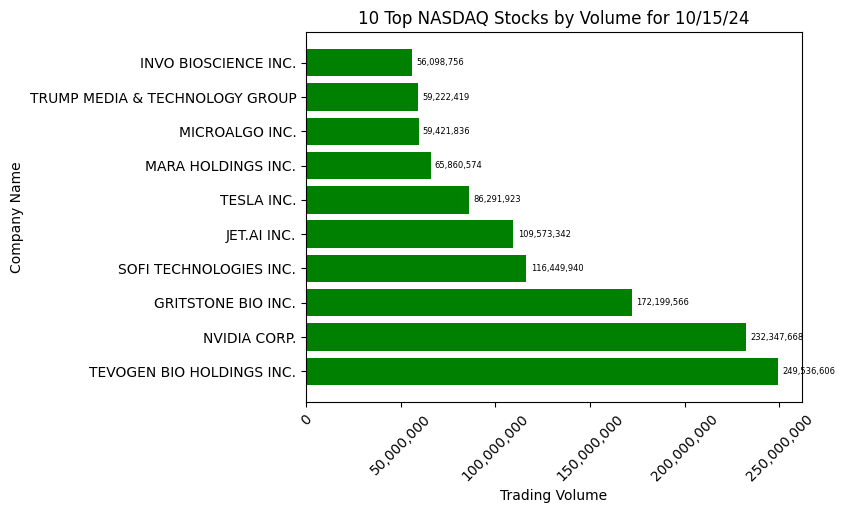

In [19]:
fig = plt.figure()
ax = plt.subplot()
bar_plot = ax.barh(names, volumes, color='green')
container = ax.containers[0]
ax.bar_label(container, labels=[f'{x:,.0f}' for x in container.datavalues],fontsize=6, padding=3)
current_volumes = plt.gca().get_xticks()
plt.gca().set_xticklabels([f'{x:,.0f}' for x in current_volumes], rotation=45)
ax.set_xlabel('Trading Volume')
ax.set_ylabel('Company Name')
now = datetime.now()
todays_date = now.strftime('%m/%d/%y')
ax.set_title('10 Top NASDAQ Stocks by Volume for ' + todays_date)
plt.show()